# Exploring Data

In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
# Warning
import warnings
warnings.filterwarnings("ignore")
# Path of the file to read
bike_file_path = 'F:\\DataMiningProject\\Bicycle_Thefts.csv'
# read the file into a variable bike_data
bike_data = pd.read_csv(bike_file_path)

In [52]:
#describe the dataset
bike_data.describe()


,X,Y,FID,Index_,Occurrence_Year,Occurrence_Month,Occurrence_Day,Division,Bike_Speed,Cost_of_Bike,Hood_ID,Lat,Long
count,2.158400e+04,2.158400e+04,21584.000000,21584.000000,21584.000000,21584.000000,21584.000000,21584.000000,21584.000000,20048.000000,21584.000000,21584.000000,21584.000000
mean,-8.838312e+06,5.414897e+06,10792.500000,10931.509544,2016.623934,7.176149,15.621016,37.040400,14.161462,937.977861,75.254679,43.672466,-79.395912
std,6.681736e+03,5.833749e+03,6230.908441,6311.114639,1.662515,2.508756,8.552982,17.644204,10.556898,1730.177314,23.919558,0.037886,0.060023
min,-8.863526e+06,5.401795e+06,1.000000,1.000000,2014.000000,1.000000,1.000000,11.000000,0.000000,0.000000,1.000000,43.587292,-79.622406
25%,-8.841113e+06,5.411416e+06,5396.750000,5465.750000,2015.000000,6.000000,8.000000,14.000000,6.000000,350.000000,71.000000,43.649860,-79.421066
50%,-8.837888e+06,5.413239e+06,10792.500000,10930.500000,2017.000000,7.000000,16.000000,51.000000,15.000000,600.000000,77.000000,43.661705,-79.392097
75%,-8.835999e+06,5.415879e+06,16188.250000,16401.250000,2018.000000,9.000000,23.000000,52.000000,21.000000,1000.000000,85.000000,43.678860,-79.375130
max,-8.807967e+06,5.440182e+06,21584.000000,22061.000000,2019.000000,12.000000,31.000000,58.000000,99.000000,120000.000000,140.000000,43.836544,-79.123314


In [53]:
#Understanding column fields
bike_data.columns

Index(['X', 'Y', 'FID', 'Index_', 'event_unique_id', 'Primary_Offence',
       'Occurrence_Date', 'Occurrence_Year', 'Occurrence_Month',
       'Occurrence_Day', 'Occurrence_Time', 'Division', 'City',
       'Location_Type', 'Premise_Type', 'Bike_Make', 'Bike_Model', 'Bike_Type',
       'Bike_Speed', 'Bike_Colour', 'Cost_of_Bike', 'Status', 'Hood_ID',
       'Neighbourhood', 'Lat', 'Long'],
      dtype='object')

In [54]:
#Checking for duplicates
total_raw=len(set(bike_data.index))
extra=bike_data.shape[0]-total_raw
print("total_rows =",total_raw)
print("number_of_duplicate rows =",extra)

total_rows = 21584
number_of_duplicate rows = 0


In [55]:
#Checking for null values
bike_data.isnull().sum()

X                      0
Y                      0
FID                    0
Index_                 0
event_unique_id        0
Primary_Offence        0
Occurrence_Date        0
Occurrence_Year        0
Occurrence_Month       0
Occurrence_Day         0
Occurrence_Time        0
Division               0
City                   0
Location_Type          0
Premise_Type           0
Bike_Make              0
Bike_Model          8141
Bike_Type              0
Bike_Speed             0
Bike_Colour         1729
Cost_of_Bike        1536
Status                 0
Hood_ID                0
Neighbourhood          0
Lat                    0
Long                   0
dtype: int64

In [56]:
# bike_model,bike_colour,cost_of_bike have missing values and these needs to be taken care before modeling

print("Percent of missing Bike_Model data : ",bike_data['Bike_Model'].isnull().sum()*100/total_raw,"%")
print("Percent of missing Bike_Colour data : ",bike_data['Bike_Colour'].isnull().sum()*100/total_raw,"%")
print("Percent of missing Cost_of_Bike data : ",bike_data['Cost_of_Bike'].isnull().sum()*100/total_raw,"%")

Percent of missing Bike_Model data :  37.717753891771686 %
Percent of missing Bike_Colour data :  8.01056338028169 %
Percent of missing Cost_of_Bike data :  7.116382505559674 %


In [57]:
#Insight: need to take care of Bike_Model data , other missing values are negligible

In [58]:
#checking the shape of data
bike_data.shape

(21584, 26)

In [59]:
#Lets see how different features are balanced

print(bike_data['Bike_Make'].value_counts())

OT                 4191
UK                 1849
OTHER              1383
GI                 1379
TR                 1133
NO                  823
GIANT               533
CC                  487
UNKNOWN MAKE        487
SPECIALIZED         472
SC                  464
TREK                457
CA                  441
RA                  408
SU                  406
KO                  375
GT                  363
CCM                 323
NORCO               288
SUPERCYCLE          247
FJ                  231
EMMO                221
RM                  209
UNKNOWN             207
RALEIGH             199
CANNONDALE          186
SCHWINN             185
MA                  179
KH                  174
EM                  111
                   ... 
OTS                   1
MERCEDES              1
MARTIN                1
SMOA SAN MARCOS       1
CRONUS                1
BOULDER               1
MIA DORA              1
AVANTI                1
BANANA                1
AMEGO BOLD            1
NORTHLAND       

# Data Transformation

In [60]:
# (OT - other,UK- unknown ,other,unknown make,unknown) belongs to same class so 8000+ entries are not targeted properly
# so we will replace all these column values to single one called 'unknown'
# needs to implement for each column 

In [61]:
# these columns seems unrelated with other columns and we remove it from df 'X', 'Y', 'FID', 'Index_', 'event_uni
#all data is from toronto so no need of city column
bike_data.drop(columns=['X', 'Y','Index_', 'event_unique_id','City'],inplace=True)
#checking shape after droping few columns
bike_data.shape

(21584, 21)

In [62]:
#Looking for categorical data
catogorical_data=bike_data.select_dtypes(include=['object']).columns
catogorical_data

Index(['Primary_Offence', 'Occurrence_Date', 'Occurrence_Time',
       'Location_Type', 'Premise_Type', 'Bike_Make', 'Bike_Model', 'Bike_Type',
       'Bike_Colour', 'Status', 'Neighbourhood'],
      dtype='object')

In [63]:
#some columns contains extra spaces that restricts us from conditional searches, so lets remove it
bike_data = bike_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [64]:
#Merge all unwanted type of Bike_Make to single value 'unknown'
bike_data.loc[(bike_data['Bike_Make'] == 'OT') | (bike_data['Bike_Make'] == 'OTHER' )|(bike_data['Bike_Make'] == 'UK')| (bike_data['Bike_Make'] == 'UNKNOWN MAKE') | (bike_data['Bike_Make']=='UNKNOWN'), 'Bike_Make'] = 'unknown'

In [65]:
print(bike_data['Bike_Make'].value_counts())

unknown           8117
GI                1379
TR                1133
NO                 823
GIANT              533
CC                 487
SPECIALIZED        472
SC                 464
TREK               457
CA                 441
RA                 408
SU                 406
KO                 375
GT                 363
CCM                323
NORCO              288
SUPERCYCLE         247
FJ                 231
EMMO               221
RM                 209
RALEIGH            199
CANNONDALE         186
SCHWINN            185
MA                 179
KH                 174
EM                 111
KONA               107
DEVINCI            104
GF                  93
DB                  89
                  ... 
KENT                 1
STATE BICYCLE        1
CYCLING              1
CHILDS               1
CANADIANA            1
WUDI                 1
CANONDALE            1
ROCKYMOUNTAIN        1
STUMY ARCHER         1
XINGYUE              1
GURU                 1
CHALLENGER           1
EUROPEAN   

# Ploting Graphs For More Insights

Primary_Offence
--------------------------------------------------
THEFT UNDER                       9784
THEFT UNDER - BICYCLE             8819
B&E                               1329
THEFT OF EBIKE UNDER $5000         342
PROPERTY - FOUND                   275
B&E W'INTENT                       181
THEFT FROM MOTOR VEHICLE UNDER     168
THEFT OVER                         135
THEFT OVER - BICYCLE                95
THEFT UNDER - SHOPLIFTING           49
POSSESSION PROPERTY OBC UNDER       45
THEFT OF MOTOR VEHICLE              42
FTC PROBATION ORDER                 37
THEFT FROM MOTOR VEHICLE OVER       31
MISCHIEF UNDER                      29
PROPERTY - LOST                     26
ROBBERY - OTHER                     24
ROBBERY - MUGGING                   23
INCIDENT                            17
THEFT OF EBIKE OVER $5000           15
FRAUD OVER                          10
ROBBERY WITH WEAPON                  9
SUSPICIOUS INCIDENT                  9
ROBBERY - SWARMING                  

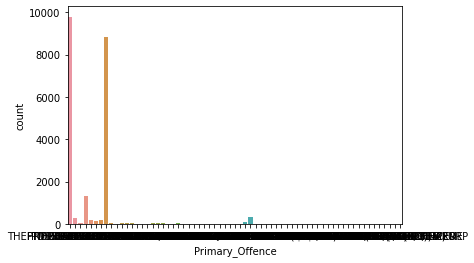

--------------------------------------------------
Occurrence_Date
--------------------------------------------------
2018/08/15 00:00:00    39
2017/09/20 00:00:00    37
2017/07/18 00:00:00    36
2019/07/29 00:00:00    33
2018/06/08 00:00:00    33
2018/06/11 00:00:00    33
2014/06/22 00:00:00    32
2016/09/12 00:00:00    32
2018/07/09 00:00:00    31
2018/07/12 00:00:00    31
2014/07/07 00:00:00    31
2019/07/21 00:00:00    31
2016/08/15 00:00:00    30
2018/06/16 00:00:00    30
2016/09/06 00:00:00    30
2018/07/24 00:00:00    29
2018/07/20 00:00:00    29
2018/07/25 00:00:00    29
2017/07/15 00:00:00    29
2018/08/10 00:00:00    29
2014/06/20 00:00:00    29
2016/05/27 00:00:00    29
2018/08/20 00:00:00    29
2014/07/10 00:00:00    28
2016/07/17 00:00:00    28
2018/08/16 00:00:00    28
2016/09/19 00:00:00    28
2019/06/19 00:00:00    28
2014/08/20 00:00:00    27
2016/09/15 00:00:00    27
                       ..
2015/02/04 00:00:00     1
2014/01/12 00:00:00     1
2014/01/29 00:00:00     

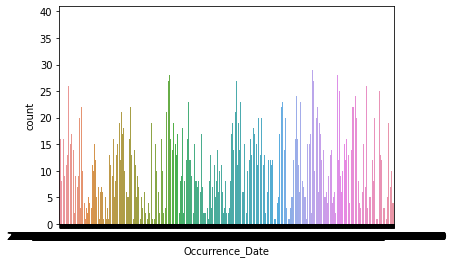

--------------------------------------------------
Occurrence_Time
--------------------------------------------------
18:00    750
12:00    695
09:00    664
17:00    650
00:00    642
20:00    576
19:00    570
21:00    555
22:00    538
23:00    522
16:00    502
15:00    450
14:00    436
10:00    400
13:00    400
08:00    378
01:00    343
11:00    308
18:30    274
08:30    255
16:30    238
19:30    237
17:30    233
15:30    214
07:00    206
22:30    203
09:30    195
14:30    191
02:00    184
12:30    175
        ... 
21:21      1
14:13      1
09:07      1
23:09      1
09:18      1
19:19      1
08:43      1
20:48      1
03:38      1
23:27      1
23:06      1
03:12      1
22:28      1
18:28      1
13:09      1
12:13      1
11:56      1
15:29      1
02:32      1
18:33      1
23:56      1
12:14      1
18:22      1
19:13      1
13:16      1
02:26      1
19:54      1
08:21      1
19:49      1
22:14      1
Name: Occurrence_Time, Length: 933, dtype: int64


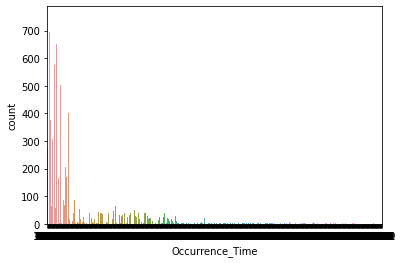

--------------------------------------------------
Location_Type
--------------------------------------------------
Apartment (Rooming House, Condo)                                          4570
Streets, Roads, Highways (Bicycle Path, Private Road)                     4539
Single Home, House (Attach Garage, Cottage, Mobile)                       3432
Parking Lots (Apt., Commercial Or Non-Commercial)                         2033
Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg    1889
Private Property (Pool, Shed, Detached Garage)                            1428
Universities / Colleges                                                    639
Open Areas (Lakes, Parks, Rivers)                                          379
Bar / Restaurant                                                           339
Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall)      307
Ttc Subway Station                                                         264
Private Propert

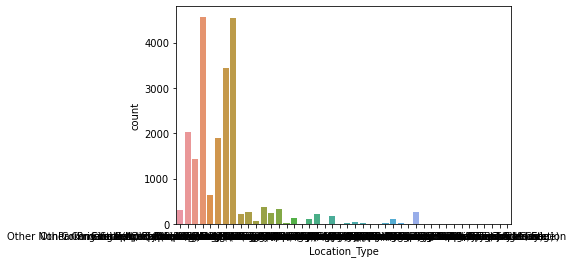

--------------------------------------------------
Premise_Type
--------------------------------------------------
Outside       6959
Apartment     4570
Other         4021
House         3432
Commercial    2602
Name: Premise_Type, dtype: int64


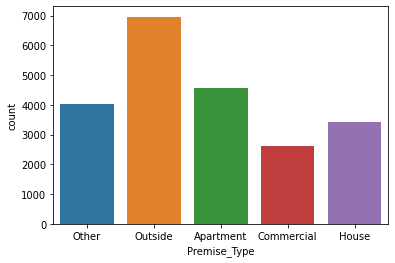

--------------------------------------------------
Bike_Make
--------------------------------------------------
unknown           8117
GI                1379
TR                1133
NO                 823
GIANT              533
CC                 487
SPECIALIZED        472
SC                 464
TREK               457
CA                 441
RA                 408
SU                 406
KO                 375
GT                 363
CCM                323
NORCO              288
SUPERCYCLE         247
FJ                 231
EMMO               221
RM                 209
RALEIGH            199
CANNONDALE         186
SCHWINN            185
MA                 179
KH                 174
EM                 111
KONA               107
DEVINCI            104
GF                  93
DB                  89
                  ... 
KENT                 1
STATE BICYCLE        1
CYCLING              1
CHILDS               1
CANADIANA            1
WUDI                 1
CANONDALE            1
ROCKYMOUNTAIN 

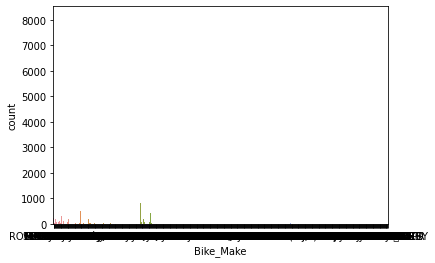

--------------------------------------------------
Bike_Model
--------------------------------------------------
UNKNOWN            265
HYBRID             105
ESCAPE              91
SIRRUS              76
YORKVILLE           55
MOUNTAIN            55
MOUNTAIN BIKE       54
ROAD BIKE           52
MILANO              51
DEW                 47
ALLEZ               46
HARDROCK            42
ESCAPE 2            37
ROAM 2              33
ROAM                33
UNK                 32
FEATHER             31
ESCAPE 3            31
CYPRESS             31
CRUISER             31
VITA                31
CROSSTRAIL          30
URBAN SOUL          30
HEART               30
TALON               30
DEW PLUS            29
AGGRESSOR           29
ROCKHOPPER          28
SYNAPSE             27
INDIE 4             26
                  ... 
CANADIAN TIRE        1
SUPERCYCLE1800       1
VIENNA 72V           1
CARRERA              1
04SW2611B            1
18 2 S BLUE          1
NEWBURY              1
BREVKELEN    

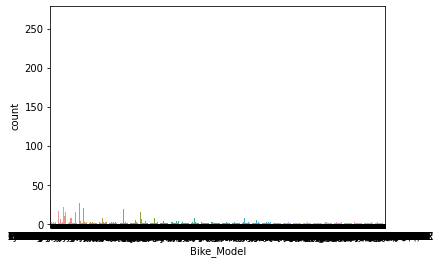

--------------------------------------------------
Bike_Type
--------------------------------------------------
MT    6915
RG    5733
OT    3513
RC    2384
TO    1127
EL    1098
BM     324
SC     250
FO     160
TR      44
TA      19
RE      12
UN       5
Name: Bike_Type, dtype: int64


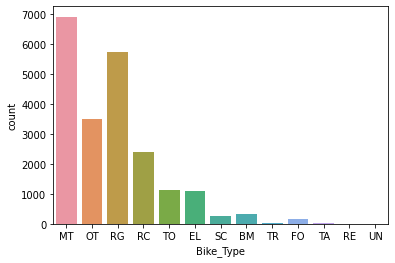

--------------------------------------------------
Bike_Colour
--------------------------------------------------
BLK       6212
BLU       1960
GRY       1798
WHI       1691
RED       1533
SIL       1010
GRN        588
ONG        398
PLE        397
DBL        341
YEL        306
LBL        267
LGR        215
DGR        201
BLKRED     193
OTH        176
BRN        158
TRQ        140
MRN        138
BLKWHI     132
BLUWHI     115
PNK        114
BLKBLU      97
BGE         92
GLD         89
BLKGRN      87
REDWHI      82
CRM         65
BLKGRY      61
BLKSIL      57
          ... 
BGEYEL       1
GRYLGR       1
DGRGRY       1
PNKYEL       1
DARK         1
GRYLBL       1
SILBGE       1
GRYMUL       1
BLKMUL       1
GRYBRN       1
PNKTRQ       1
GRYOTH       1
18           1
BRNONG       1
LBLDBL       1
DBLYEL       1
BGEMRN       1
SILPNK       1
BLKOTH       1
PLEGRN       1
PLEMRN       1
CPRGLD       1
DGRLBL       1
GLDSIL       1
BLACK&       1
BUR          1
GRNPNK       1
CRMWHI       1
P

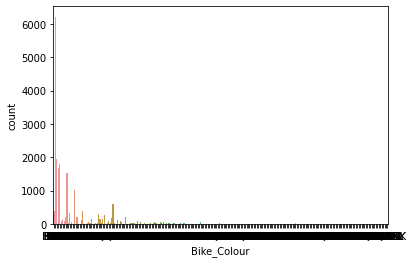

--------------------------------------------------
Status
--------------------------------------------------
STOLEN       20929
UNKNOWN        403
RECOVERED      252
Name: Status, dtype: int64


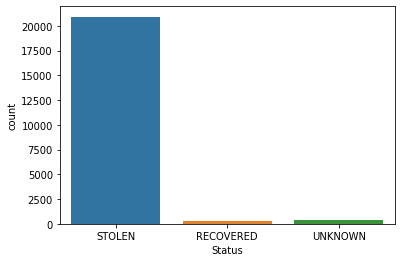

--------------------------------------------------
Neighbourhood
--------------------------------------------------
Waterfront Communities-The Island (77)      2271
Bay Street Corridor (76)                    1956
Church-Yonge Corridor (75)                  1412
Niagara (82)                                 876
Annex (95)                                   743
Kensington-Chinatown (78)                    730
Moss Park (73)                               719
University (79)                              707
South Riverdale (70)                         616
Dovercourt-Wallace Emerson-Junction (93)     548
Cabbagetown-South St.James Town (71)         382
Mimico (includes Humber Bay Shores) (17)     357
Trinity-Bellwoods (81)                       338
Rosedale-Moore Park (98)                     336
Palmerston-Little Italy (80)                 322
Little Portugal (84)                         321
North St.James Town (74)                     315
Roncesvalles (86)                            282
Hi

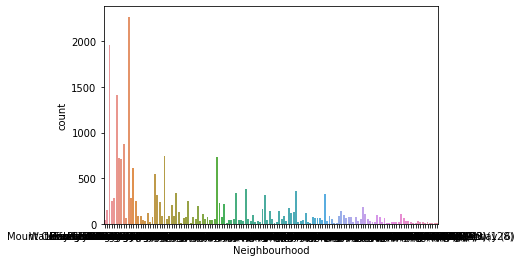

--------------------------------------------------


In [66]:
#detailed view of each columns that are categorical
for c in catogorical_data:
    print(c)
    print("-"*50)
    print(bike_data[c].value_counts())
    sns.countplot(x=c, data=bike_data)
    plt.show()
    print("-"*50)

In [ ]:
#we will also apply these analysis on interesting numerical columns as well
interest_data=['Occurrence_Year','Occurrence_Month','Occurrence_Day','Division','Hood_ID']
for c in interest_data:
    print(c)
    print("-"*50)
    print(bike_data[c].value_counts())
    sns.countplot(x=c, data=bike_data)
    plt.show()
    print("-"*50)

In [ ]:
#deal with missing values
#merge same named column values to one
#remove out of jurisdiction rows
#we know that OJ stands for out of jurisdiction, Here we are dealing only with torronto based data .
#So we can remove rows containing this 

In [67]:
# Variable with the Longitude and Latitude
X=bike_data.loc[:,['FID','Lat','Long']]

# Feature Engineering And Ploting Figures

In [68]:
#using DBSCAN to project location coordinates to sperical surface 
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
#copying the coordinates
coords = X.as_matrix(columns=['Lat', 'Long'])

In [69]:
#finding number of clusters in difined rage 
kms_per_radian = 6371.0088
epsilon = 1.4/kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 3


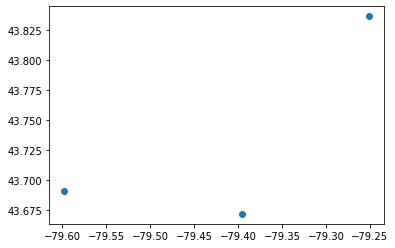

In [71]:
#Ploting the center points on to the graph
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)
testList2 = [(elem2,elem1) for elem1, elem2 in centermost_points]
testList2
zip(*testList2)
plt.scatter(*zip(*testList2))
plt.show()

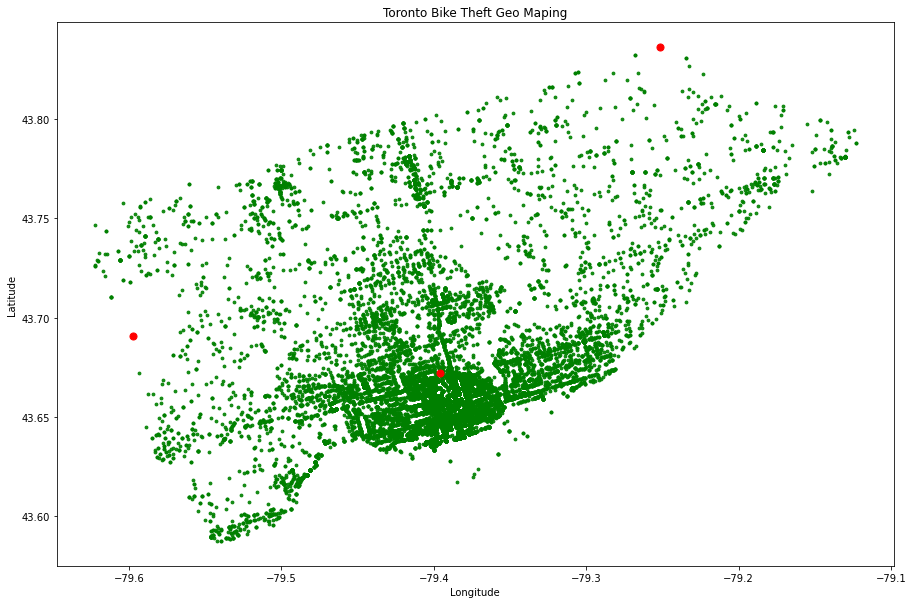

In [72]:
#Finally ploting the location data to get basic understanding of stolen bike map
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'Long':lons, 'Lat':lats})
fig, ax = plt.subplots(figsize=[15, 10])
df_scatter = ax.scatter(X['Long'], X['Lat'], c='g', alpha=0.9, s=8)
center_scatter=ax.scatter(*zip(*testList2),c='r',s=50)
d

In [73]:
# we got toronto map while ploting the bike stolen cases 
#Now lets look for furture engineering with the location data we have

In [74]:
lats, lons = zip(*centermost_points)
bike_data.head()

,FID,Primary_Offence,Occurrence_Date,Occurrence_Year,Occurrence_Month,Occurrence_Day,Occurrence_Time,Division,Location_Type,Premise_Type,...,Bike_Model,Bike_Type,Bike_Speed,Bike_Colour,Cost_of_Bike,Status,Hood_ID,Neighbourhood,Lat,Long
0,1,THEFT UNDER,2014/05/10 00:00:00,2014,5,10,16:30,23,Other Non Commercial / Corporate Places (Non-P...,Other,...,NaN,MT,10,ONG,NaN,STOLEN,2,Mount Olive-Silverstone-Jamestown (2),43.739670,-79.580597
1,2,PROPERTY - FOUND,2014/05/11 00:00:00,2014,5,11,18:30,53,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,...,TRAILHEAD,MT,1,BLK,NaN,RECOVERED,56,Leaside-Bennington (56),43.703518,-79.364586
2,3,THEFT UNDER,2014/05/11 00:00:00,2014,5,11,18:00,52,Other Non Commercial / Corporate Places (Non-P...,Other,...,NaN,MT,18,BLU,200.0,STOLEN,76,Bay Street Corridor (76),43.662968,-79.383987
3,4,THEFT UNDER,2014/05/11 00:00:00,2014,5,11,19:00,55,"Private Property (Pool, Shed, Detached Garage)",Other,...,NaN,OT,24,WHI,1600.0,STOLEN,62,East End-Danforth (62),43.686817,-79.291496
4,5,THEFT UNDER,2014/05/11 00:00:00,2014,5,11,19:00,55,"Private Property (Pool, Shed, Detached Garage)",Other,...,NaN,OT,18,BLU,650.0,STOLEN,62,East End-Danforth (62),43.686817,-79.291496


In [75]:
#Choosing the target data and checking it's structure
label=bike_data.Status.unique()
label

array(['STOLEN', 'RECOVERED', 'UNKNOWN'], dtype=object)

In [76]:
# Function to find the distance between to geo coordinates
def distance_map(lat1,long1,lat2,long2):
    dx = (long1-long2)*40000*math.cos((lat1+lat2)*math.pi/360)/360
    dy = (lat1-lat2)*40000/360
    return dx-dy

In [77]:
# Finding the distance of each lat,long coordinates from nearby center points and assigning values based on this distance.
def find_center(lat,lon):
    c,j=zip(*centermost_points)
    c=list(c)
    j=list(j)
    n1=abs(distance_map(lat,lon,c[0],j[0]))
    n2=abs(distance_map(lat,lon,c[1],j[1]))
    n3=abs(distance_map(lat,lon,c[2],j[2]))
    minimum = min(n1,n2,n3)
    if (minimum==n1):
        case='A'
    elif(minimum==n2):
        case='B'
    else:
        case='C'
    return case 


In [78]:
#Creating new column 'group' having values A,B,C based on their distance from nearest Center Points.
bike_data['group']=bike_data.apply(lambda x: find_center(x['Lat'], x['Long']), axis=1)

In [79]:
#since we have many catogorical sub sections for each column, we will use count/frequency encoding
catogorical_data=bike_data.select_dtypes(include=['object']).columns
for c in catogorical_data:
    df_fq_map=bike_data[c].value_counts().to_dict()
    bike_data[c]=bike_data[c].map(df_fq_map)

In [80]:
#lets remove fid and location data from dataframe
bike_data.drop(columns=['FID', 'Lat','Long','Bike_Model'],inplace=True)
#checking shape after droping few columns
bike_data.shape

(21584, 18)

In [81]:
#checking the final columns we have to use for modeling
bike_data.columns

Index(['Primary_Offence', 'Occurrence_Date', 'Occurrence_Year',
       'Occurrence_Month', 'Occurrence_Day', 'Occurrence_Time', 'Division',
       'Location_Type', 'Premise_Type', 'Bike_Make', 'Bike_Type', 'Bike_Speed',
       'Bike_Colour', 'Cost_of_Bike', 'Status', 'Hood_ID', 'Neighbourhood',
       'group'],
      dtype='object')

In [82]:
#Getting a final look on the dataframe before modeling
bike_data.head()

,Primary_Offence,Occurrence_Date,Occurrence_Year,Occurrence_Month,Occurrence_Day,Occurrence_Time,Division,Location_Type,Premise_Type,Bike_Make,Bike_Type,Bike_Speed,Bike_Colour,Cost_of_Bike,Status,Hood_ID,Neighbourhood,group
0,9784,10,2014,5,10,238,23,307,4021,247,6915,10,398.0,NaN,20929,2,40,1011
1,275,10,2014,5,11,274,53,2033,6959,82,6915,1,6212.0,NaN,252,56,151,17321
2,9784,10,2014,5,11,750,52,307,4021,31,6915,18,1960.0,200.0,20929,76,1956,17321
3,9784,10,2014,5,11,570,55,1428,4021,52,3513,24,1691.0,1600.0,20929,62,247,17321
4,9784,10,2014,5,11,570,55,1428,4021,199,3513,18,1960.0,650.0,20929,62,247,17321


In [83]:
#Checking for null values
bike_data.isnull().sum()

Primary_Offence        0
Occurrence_Date        0
Occurrence_Year        0
Occurrence_Month       0
Occurrence_Day         0
Occurrence_Time        0
Division               0
Location_Type          0
Premise_Type           0
Bike_Make              0
Bike_Type              0
Bike_Speed             0
Bike_Colour         1729
Cost_of_Bike        1536
Status                 0
Hood_ID                0
Neighbourhood          0
group                  0
dtype: int64

In [84]:
#Replacing these values with their respective mode
for column in ['Bike_Colour', 'Cost_of_Bike']:
    bike_data[column].fillna(bike_data[column].mode()[0], inplace=True)

In [85]:
bike_data

,Primary_Offence,Occurrence_Date,Occurrence_Year,Occurrence_Month,Occurrence_Day,Occurrence_Time,Division,Location_Type,Premise_Type,Bike_Make,Bike_Type,Bike_Speed,Bike_Colour,Cost_of_Bike,Status,Hood_ID,Neighbourhood,group
0,9784,10,2014,5,10,238,23,307,4021,247,6915,10,398.0,500.00,20929,2,40,1011
1,275,10,2014,5,11,274,53,2033,6959,82,6915,1,6212.0,500.00,252,56,151,17321
2,9784,10,2014,5,11,750,52,307,4021,31,6915,18,1960.0,200.00,20929,76,1956,17321
3,9784,10,2014,5,11,570,55,1428,4021,52,3513,24,1691.0,1600.00,20929,62,247,17321
4,9784,10,2014,5,11,570,55,1428,4021,199,3513,18,1960.0,650.00,20929,62,247,17321
5,9784,13,2014,5,9,255,11,1428,4021,8117,6915,0,1798.0,300.00,20929,88,279,3252
6,9784,10,2014,5,11,184,51,4570,4570,61,5733,1,6212.0,700.00,20929,75,1412,17321
7,9784,6,2014,5,1,695,52,639,4021,247,3513,21,97.0,250.00,20929,76,1956,17321
8,29,11,2014,5,8,538,51,1428,4021,199,5733,3,158.0,500.00,20929,73,719,17321
9,9784,10,2014,5,5,18,52,639,4021,288,3513,27,1798.0,1200.00,20929,79,707,17321


# Data Splitting And Modeling

In [86]:
# Spliting the coloumns in to seperate targer column
X = bike_data.loc[:, bike_data.columns != 'Status']
K=X
X = X.values
# Selecting the target column
y = bike_data['Status'].values

20929    20929
403        403
252        252
Name: Status, dtype: int64

In [38]:
K.columns

Index(['Primary_Offence', 'Occurrence_Date', 'Occurrence_Year',
       'Occurrence_Month', 'Occurrence_Day', 'Occurrence_Time', 'Division',
       'Location_Type', 'Premise_Type', 'Bike_Make', 'Bike_Type', 'Bike_Speed',
       'Bike_Colour', 'Cost_of_Bike', 'Hood_ID', 'Neighbourhood', 'group'],
      dtype='object')

In [87]:
#Importing all algorithms needed for the model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [88]:
#Spliting the the dataframe into train and test (70:30) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [126]:
#the target data seems to be more unbalanced hence we need to balance inorder to eliminate machine getting biased
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler()# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)
print(Counter(y_rus))

Counter({252: 252, 403: 252, 20929: 252})


In [128]:
#Fiting model using different algorithms to find the efficient one
algo = {
    'LR': LogisticRegression(),
 'DT':DecisionTreeClassifier(),
 'RFC':RandomForestClassifier(n_estimators=100),
 #'SVM':SVC(gamma=0.01),
 'KNN':KNeighborsClassifier(n_neighbors=10)
 }
for k, v in algo.items():
    model = v
    model.fit(x_rus, y_rus)
    print('Acurracy of ' + k + ' is {0:.2f}'.format(model.score(X_test, y_test)*100)+'%')


Acurracy of LR is 71.59%
Acurracy of DT is 58.62%
Acurracy of RFC is 77.69%
Acurracy of KNN is 61.80%


In [119]:
#Predicting the test set
z=X_test[:]
testY_predict=model.predict(z)

In [120]:
#Generating confusion matrix to get more understanding on the prediction accuracy
from sklearn.metrics import confusion_matrix
print("Confusion matrix \n" ,confusion_matrix(y_test, testY_predict))

Confusion matrix 
 [[  31   23   16]
 [  21   95   18]
 [1716  730 3826]]


In [121]:
#Pickling the model for using it later
import joblib
joblib.dump(model, 'F:\\DataMiningProject\\modelxx.pkl')
print("Model dumped!")
model_columns = list(K.columns)
print(model_columns)
joblib.dump(model_columns, 'F:\\DataMiningProject\\model_columnsxx.pkl')
print("Models columns dumped!")

Model dumped!
['Primary_Offence', 'Occurrence_Date', 'Occurrence_Year', 'Occurrence_Month', 'Occurrence_Day', 'Occurrence_Time', 'Division', 'Location_Type', 'Premise_Type', 'Bike_Make', 'Bike_Type', 'Bike_Speed', 'Bike_Colour', 'Cost_of_Bike', 'Hood_ID', 'Neighbourhood', 'group']
Models columns dumped!
